<a href="https://colab.research.google.com/github/juhanurmonen/Colab_notebooks/blob/main/JAX-introduction-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import jax
import jax.numpy as jnp

import numpy as np

import matplotlib.pyplot as plt

## JAX vs Numpy syntax:

In [ ]:
# -- Numpy --
x = np.arange(start=0, stop=1000)
np.dot(x, x)

# -- JAX --
x = jnp.arange(start=0, stop=1000)
jnp.dot(x, x.T)

DeviceArray(332833500, dtype=int32)

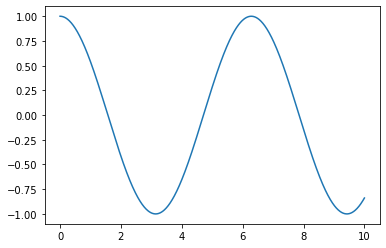

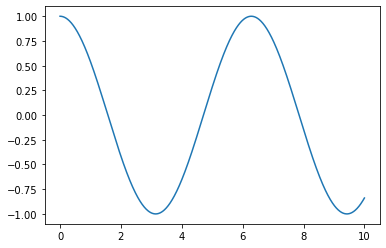

In [ ]:
# -- Numpy --
x = np.linspace(0, 10, 1000)
y = np.cos(x)
plt.plot(x, y)
plt.show()

# -- JAX --
x = jnp.linspace(0, 10, 1000)
y = jnp.cos(x)
plt.plot(x, y)
plt.show()

In [ ]:
# -- Numpy --
theta = np.pi / 4
rot = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)],
])
x = np.array([1,0])
rot_x = np.dot(rot, x)

In [ ]:
# -- JAX --
theta = jnp.pi / 4
rot = jnp.array([
    [jnp.cos(theta), -jnp.sin(theta)],
    [jnp.sin(theta),  jnp.cos(theta)],
])
x = jnp.array([1,0])
rot_x = jnp.dot(rot, x)

# JIT:

### 1- Sum of powers of a matrix:

In [ ]:
def pow_sum_np(x):
    return x + np.dot(x, x) + np.dot( np.dot(x, x) , x )

def pow_sum_jax(x):
    return x + jnp.dot(x, x) + jnp.dot( jnp.dot(x, x) , x )

pow_sum_jit = jax.jit(pow_sum_jax)

x = np.random.rand(1000,1000)

In [ ]:
%timeit pow_sum_np(x)

136 ms ± 2.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit pow_sum_jit(x)

38.8 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2- ReLU:

In [ ]:
def relu_np(x):
    return np.where(x > 0, x, 0)

@jax.jit
def relu_jax(x):
    return jnp.where(x > 0, x, 0)
# relu_jit = jax.jit(relu_jax)

x = np.random.rand(1000000)

### 3- Neural net:

In [ ]:
def neural_net_np(x, W1, W2, W3, b1, b2, b3):
    x = np.dot(W1, x) + b1
    x = np.where(x > 0, x, 0)
    x = np.dot(W2, x) + b2
    x = np.where(x > 0, x, 0)
    x = np.dot(W3, x) + b3
    return x

def neural_net_jax(x, W1, W2, W3, b1, b2, b3):
    x = jnp.dot(W1, x) + b1
    x = jnp.where(x > 0, x, 0)
    x = jnp.dot(W2, x) + b2
    x = jnp.where(x > 0, x, 0)
    x = jnp.dot(W3, x) + b3
    return x
neural_net_jit = jax.jit(neural_net_jax)

x = np.random.rand(10)

W1 = np.random.rand(32, 10)
W2 = np.random.rand(64, 32)
W3 = np.random.rand(10, 64)

b1 = np.random.rand(32)
b2 = np.random.rand(64)
b3 = np.random.rand(10)


In [ ]:
%timeit neural_net_np(x, W1, W2, W3, b1, b2, b3)

18.6 µs ± 507 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit neural_net_jit(x, W1, W2, W3, b1, b2, b3)

19.5 µs ± 2.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Grad:

### one input | one output:

In [ ]:
def sigmoid(x):
    return 1.0 / (1.0 + jnp.exp(-x))

sigmoid_grad = jax.grad(sigmoid)
print(sigmoid_grad(-1.0))
print(sigmoid_grad(.0))
print(sigmoid_grad(5.0))

0.19661194
0.25
0.006648056


### multiple inputs | one output:

$$ f(x_{0}, x_{1}) = x_{0}^2 + x_{1}^3 + 2 \times x_{0} + 3 \times x_{1} + x_{0} \times x_{1} $$
$$
\begin{cases}
\frac{\partial f}{\partial x_{0}} = 2 \times x_{0} + 2 + x_{1} \\
\frac{\partial f}{\partial x_{1}} = 3 \times x_{1}^2 + 3 + x_{0}
\end{cases}
$$

In [ ]:
def f(x):
    return x[0]**2 + x[1]**3 + 2*x[0] + 3*x[1] + x[0]*x[1]
f_grad = jax.grad(f)

x = np.array([1., 2.])
f_grad(x)

DeviceArray([ 6., 16.], dtype=float32)

### one intput | multiple outputs:

In [ ]:
def f(x):
    return 1., x, x**2, x**3
f_grad = jax.jacobian(f)

f_grad(2.)

(DeviceArray(0., dtype=float32, weak_type=True),
 DeviceArray(1., dtype=float32, weak_type=True),
 DeviceArray(4., dtype=float32, weak_type=True),
 DeviceArray(12., dtype=float32, weak_type=True))

### multiple intputs | multiple outputs:

In [ ]:
def f(x):
    return x[0], x[1], 2*x[0] + 3*x[1], x[0]**2*x[1]**3
f_grad = jax.jacobian(f)

x = jnp.array([2., 5.])
f_grad(x)

(DeviceArray([1., 0.], dtype=float32),
 DeviceArray([0., 1.], dtype=float32),
 DeviceArray([2., 3.], dtype=float32),
 DeviceArray([500., 300.], dtype=float32))

### n-th order derivative:

In [ ]:
# f(x) = x^3
# f'(x) = 3x^2
# f''(x) = 6x
# f'''(x) = 6
# f''''(x) = 0
def f(x):
    return x**3

f_d1 = jax.grad(f)
f_d2 = jax.grad(f_d1)
f_d3 = jax.grad(f_d2)
f_d4 = jax.grad(f_d3)

x = 2.
f_d1(x), f_d2(x), f_d3(x), f_d4(x)

(DeviceArray(12., dtype=float32, weak_type=True),
 DeviceArray(12., dtype=float32, weak_type=True),
 DeviceArray(6., dtype=float32, weak_type=True),
 DeviceArray(0., dtype=float32, weak_type=True))

# Vectorization VMAP:

### Batchify:

In [ ]:
mat = np.random.rand(150, 100)
batched_x = np.random.rand(10, 100)

def apply_matrix(v):
    return jnp.dot(mat, v)

jax.vmap(apply_matrix)(batched_x)

DeviceArray([[28.832396, 26.430086, 27.318174, ..., 29.020882, 28.34953 ,
              28.072021],
             [28.064995, 23.668158, 26.287748, ..., 25.718317, 26.299923,
              23.677965],
             [27.22749 , 23.348494, 25.518791, ..., 25.624691, 24.747768,
              25.336374],
             ...,
             [28.31358 , 24.604685, 26.199242, ..., 29.09837 , 26.258087,
              25.034042],
             [27.448357, 24.651457, 25.654737, ..., 26.612352, 26.28826 ,
              25.913837],
             [29.377924, 25.19844 , 27.933325, ..., 25.56333 , 26.376898,
              24.865858]], dtype=float32)

In [ ]:
f(x)

array([ 2.1       ,  2.0972803 ,  2.09456176, ..., 32.48240054,
       32.4911997 , 32.5       ])

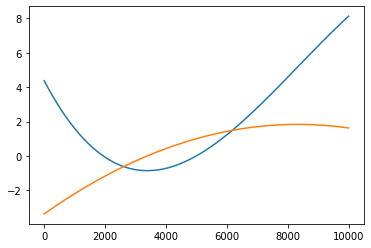

In [ ]:
def f(x):
    return -1/40*x**3 + 1/4*x**2 + x
f_grad = jax.grad(f)

x = jnp.linspace(-5, 5, 10000)

plt.plot(jax.vmap(f)(x))
plt.plot(jax.vmap(f_grad)(x))
plt.show()